In [20]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder, OneHotEncoder

In [21]:
pd.set_option("display.max_columns", None)

In [22]:
PROJECT_FOLDER = os.getcwd()
DATA_FILEPATH = os.path.join(PROJECT_FOLDER, "data", "weatherAUS.csv")

### Preview the dataset

In [23]:
df = pd.read_csv(DATA_FILEPATH)
df.head()

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,2008-12-01,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,WNW,20.0,24.0,71.0,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,No,No
1,2008-12-02,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,WSW,4.0,22.0,44.0,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,No,No
2,2008-12-03,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,WSW,19.0,26.0,38.0,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,No,No
3,2008-12-04,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,E,11.0,9.0,45.0,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,No,No
4,2008-12-05,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,NW,7.0,20.0,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No,No


In [24]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 145460 entries, 0 to 145459
Data columns (total 23 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   Date           145460 non-null  object 
 1   Location       145460 non-null  object 
 2   MinTemp        143975 non-null  float64
 3   MaxTemp        144199 non-null  float64
 4   Rainfall       142199 non-null  float64
 5   Evaporation    82670 non-null   float64
 6   Sunshine       75625 non-null   float64
 7   WindGustDir    135134 non-null  object 
 8   WindGustSpeed  135197 non-null  float64
 9   WindDir9am     134894 non-null  object 
 10  WindDir3pm     141232 non-null  object 
 11  WindSpeed9am   143693 non-null  float64
 12  WindSpeed3pm   142398 non-null  float64
 13  Humidity9am    142806 non-null  float64
 14  Humidity3pm    140953 non-null  float64
 15  Pressure9am    130395 non-null  float64
 16  Pressure3pm    130432 non-null  float64
 17  Cloud9am       89572 non-null

In [25]:
df.select_dtypes(exclude='object').describe()

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm
count,143975.000000,144199.000000,142199.000000,82670.000000,75625.000000,135197.000000,143693.000000,142398.000000,142806.000000,140953.000000,130395.00000,130432.000000,89572.000000,86102.000000,143693.000000,141851.00000
mean,12.194034,23.221348,2.360918,5.468232,7.611178,40.035230,14.043426,18.662657,68.880831,51.539116,1017.64994,1015.255889,4.447461,4.509930,16.990631,21.68339
std,6.398495,7.119049,8.478060,4.193704,3.785483,13.607062,8.915375,8.809800,19.029164,20.795902,7.10653,7.037414,2.887159,2.720357,6.488753,6.93665
min,-8.500000,-4.800000,0.000000,0.000000,0.000000,6.000000,0.000000,0.000000,0.000000,0.000000,980.50000,977.100000,0.000000,0.000000,-7.200000,-5.40000
25%,7.600000,17.900000,0.000000,2.600000,4.800000,31.000000,7.000000,13.000000,57.000000,37.000000,1012.90000,1010.400000,1.000000,2.000000,12.300000,16.60000
50%,12.000000,22.600000,0.000000,4.800000,8.400000,39.000000,13.000000,19.000000,70.000000,52.000000,1017.60000,1015.200000,5.000000,5.000000,16.700000,21.10000
75%,16.900000,28.200000,0.800000,7.400000,10.600000,48.000000,19.000000,24.000000,83.000000,66.000000,1022.40000,1020.000000,7.000000,7.000000,21.600000,26.40000
max,33.900000,48.100000,371.000000,145.000000,14.500000,135.000000,130.000000,87.000000,100.000000,100.000000,1041.00000,1039.600000,9.000000,9.000000,40.200000,46.70000


### Handling mission values

In [26]:
print('Number of missing values per column is:')
df.isna().sum()

Number of missing values per column is:


Date                 0
Location             0
MinTemp           1485
MaxTemp           1261
Rainfall          3261
Evaporation      62790
Sunshine         69835
WindGustDir      10326
WindGustSpeed    10263
WindDir9am       10566
WindDir3pm        4228
WindSpeed9am      1767
WindSpeed3pm      3062
Humidity9am       2654
Humidity3pm       4507
Pressure9am      15065
Pressure3pm      15028
Cloud9am         55888
Cloud3pm         59358
Temp9am           1767
Temp3pm           3609
RainToday         3261
RainTomorrow      3267
dtype: int64

In [27]:
print('Percentage of missing values per column is:')
df.isna().sum() / df.shape[0] * 100

Percentage of missing values per column is:


Date              0.000000
Location          0.000000
MinTemp           1.020899
MaxTemp           0.866905
Rainfall          2.241853
Evaporation      43.166506
Sunshine         48.009762
WindGustDir       7.098859
WindGustSpeed     7.055548
WindDir9am        7.263853
WindDir3pm        2.906641
WindSpeed9am      1.214767
WindSpeed3pm      2.105046
Humidity9am       1.824557
Humidity3pm       3.098446
Pressure9am      10.356799
Pressure3pm      10.331363
Cloud9am         38.421559
Cloud3pm         40.807095
Temp9am           1.214767
Temp3pm           2.481094
RainToday         2.241853
RainTomorrow      2.245978
dtype: float64

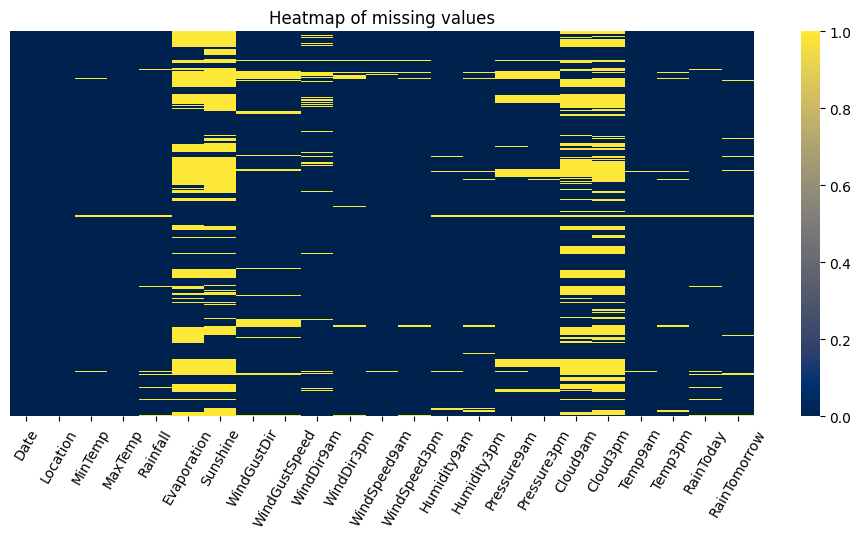

In [28]:
plt.figure(figsize=(12,5))
sns.heatmap(df.isnull(), cbar=True, cmap='cividis', yticklabels=False)
plt.xticks(rotation=60)
plt.title('Heatmap of missing values')
plt.show()

In [29]:
numerical_columns = df.select_dtypes(include=['float']).columns
categorical_columns = df.select_dtypes(include=['object']).columns
print('List of numerical columns:')
print(numerical_columns)
print('List of categorical columns:')
print(categorical_columns)

List of numerical columns:
Index(['MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation', 'Sunshine',
       'WindGustSpeed', 'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am',
       'Humidity3pm', 'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm',
       'Temp9am', 'Temp3pm'],
      dtype='object')
List of categorical columns:
Index(['Date', 'Location', 'WindGustDir', 'WindDir9am', 'WindDir3pm',
       'RainToday', 'RainTomorrow'],
      dtype='object')


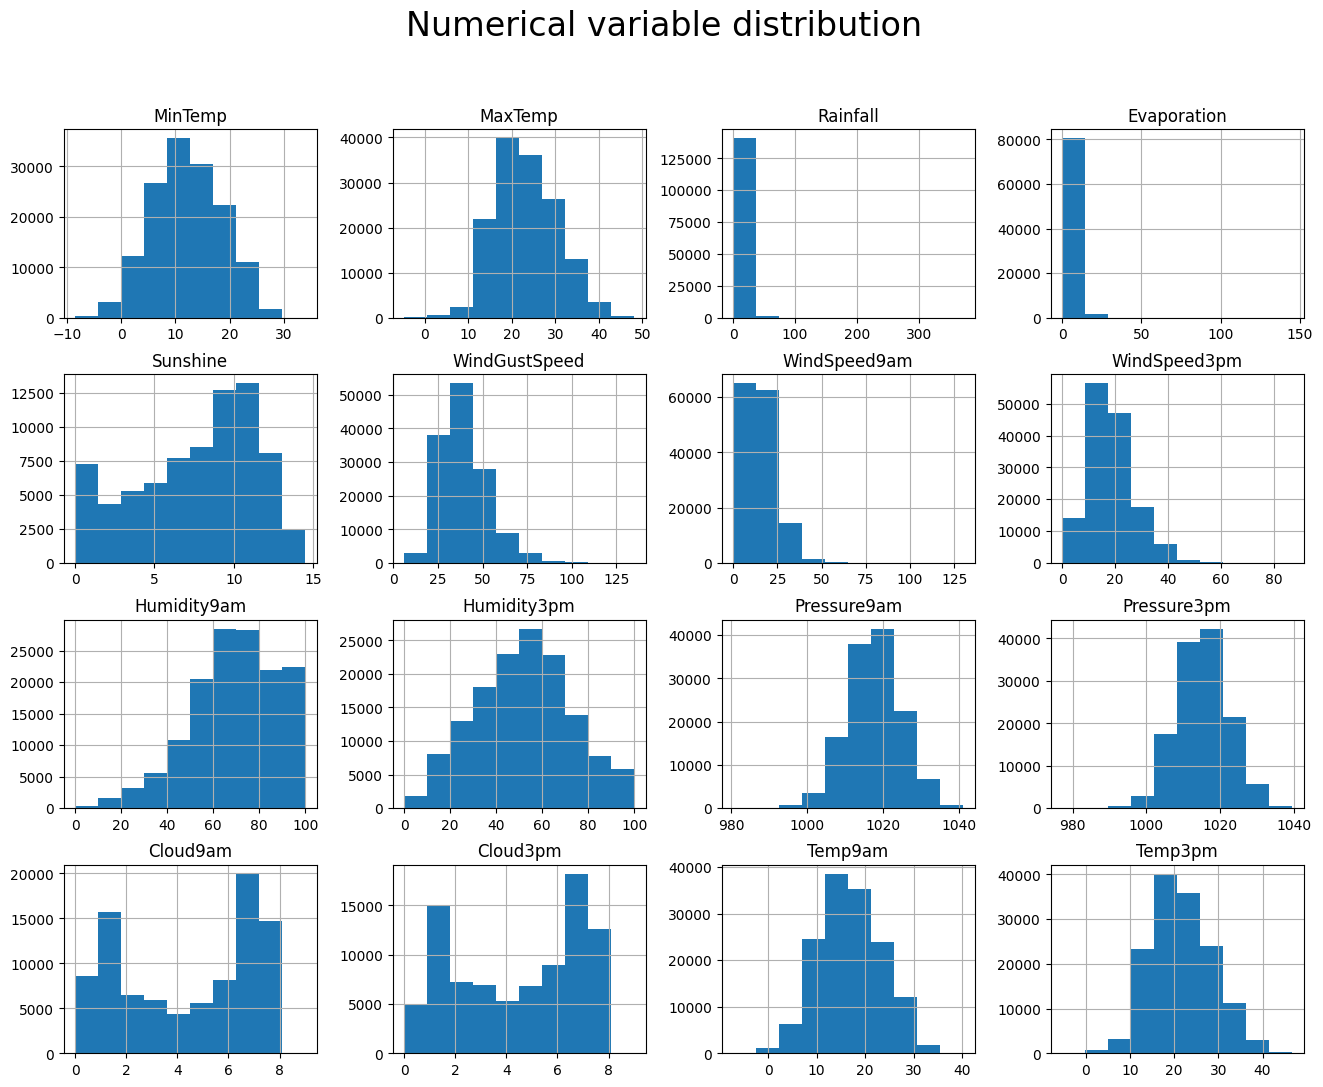

In [30]:
df.hist(column=numerical_columns, figsize=(16, 12))
plt.suptitle('Numerical variable distribution', fontsize=24)
plt.show()

Imputing NaN values using median / mode grouped by Location

In [31]:
print('List of unique locations is:')
locations = df['Location'].unique()
print(locations)
df[numerical_columns] = df.groupby('Location')[numerical_columns].transform(lambda group: group.fillna(group.median()))
df[categorical_columns] = df.groupby('Location')[categorical_columns].transform(lambda group: group.fillna(group.mode().iloc[0]))

List of unique locations is:
['Albury' 'BadgerysCreek' 'Cobar' 'CoffsHarbour' 'Moree' 'Newcastle'
 'NorahHead' 'NorfolkIsland' 'Penrith' 'Richmond' 'Sydney' 'SydneyAirport'
 'WaggaWagga' 'Williamtown' 'Wollongong' 'Canberra' 'Tuggeranong'
 'MountGinini' 'Ballarat' 'Bendigo' 'Sale' 'MelbourneAirport' 'Melbourne'
 'Mildura' 'Nhil' 'Portland' 'Watsonia' 'Dartmoor' 'Brisbane' 'Cairns'
 'GoldCoast' 'Townsville' 'Adelaide' 'MountGambier' 'Nuriootpa' 'Woomera'
 'Albany' 'Witchcliffe' 'PearceRAAF' 'PerthAirport' 'Perth' 'SalmonGums'
 'Walpole' 'Hobart' 'Launceston' 'AliceSprings' 'Darwin' 'Katherine'
 'Uluru']


/home/dzungnguyen/anaconda3/envs/rain-in-australia/lib/python3.13/site-packages/numpy/lib/_nanfunctions_impl.py:1215: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)
/home/dzungnguyen/anaconda3/envs/rain-in-australia/lib/python3.13/site-packages/numpy/lib/_nanfunctions_impl.py:1215: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)
/tmp/ipykernel_255914/3225453530.py:5: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df[categorical_columns] = df.groupby('Location')[categorical_columns].transform(lambda group: group.fillna(group.mode().iloc[0]))


In [32]:
print('Number of missing values after transformation:')
df.isna().sum()

Number of missing values after transformation:


Date                 0
Location             0
MinTemp              0
MaxTemp              0
Rainfall             0
Evaporation      45511
Sunshine         53169
WindGustDir       6079
WindGustSpeed     6079
WindDir9am           0
WindDir3pm           0
WindSpeed9am         0
WindSpeed3pm         0
Humidity9am          0
Humidity3pm          0
Pressure9am      12119
Pressure3pm      12119
Cloud9am         34967
Cloud3pm         34967
Temp9am              0
Temp3pm              0
RainToday            0
RainTomorrow         0
dtype: int64

In [33]:
print('Columns with % of missing values after transformation:')
nan_percentage = df.isna().sum() / df.shape[0] * 100
columns_with_nan = nan_percentage[nan_percentage > 0].index.tolist()
nan_percentage[nan_percentage > 0]

Columns with % of missing values after transformation:


Evaporation      31.287639
Sunshine         36.552317
WindGustDir       4.179156
WindGustSpeed     4.179156
Pressure9am       8.331500
Pressure3pm       8.331500
Cloud9am         24.038911
Cloud3pm         24.038911
dtype: float64

We still have NaN values that cannot be filled using data at the same location. The solution is to drop either all these rows or these columns.

Since some columns contain a large amount of NaN values, we risk losing significant data if we drop rows. Therefore, we will check the correlation of each column with the target variable RainTomorrow.

Any columns with correlation close to 0 will be removed. 

We will only calculate the correlations of numerical columns because:
- The only categorical column is WindGustDir
- Its nan values only cover 4%we 

Correlations of numerical columns with target column:


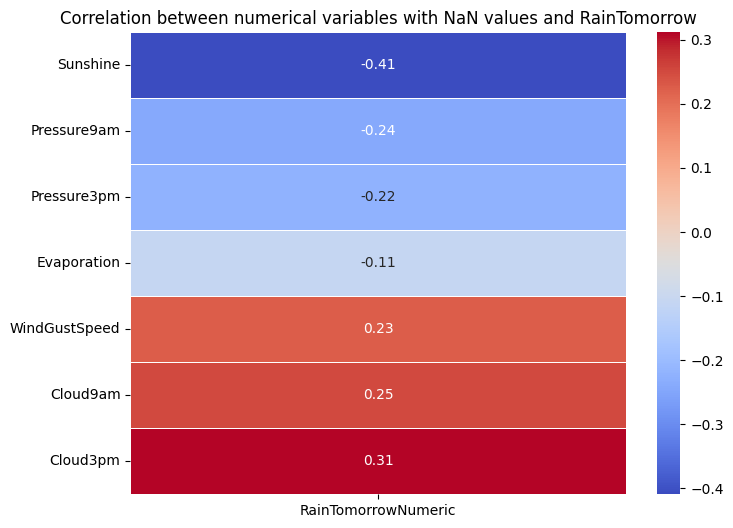

In [34]:
print('Correlations of numerical columns with target column:')

df['RainTomorrowNumeric'] = df['RainTomorrow'].map({'Yes': 1, 'No': 0})
numerical_columns_with_nan = [col for col in columns_with_nan if df[col].dtype in ['float64', 'int64']]
numerical_correlation = df[numerical_columns_with_nan + ['RainTomorrowNumeric']].corr()['RainTomorrowNumeric'].drop('RainTomorrowNumeric')
corr_matrix = numerical_correlation.sort_values().to_frame()

plt.figure(figsize=(8, 6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', cbar=True, fmt='.2f', linewidths=0.5)

plt.title("Correlation between numerical variables with NaN values and RainTomorrow")
plt.yticks(rotation=0)  # Keep y-axis labels horizontal
plt.show()

Since the column 'Evaporation' has a correlation near 0 with the target column and 30% of it is missing values, we drop this column.

In [ ]:
df = df.drop(columns='Evaporation').dropna()
df = df.drop(columns='RainTomorrowNumeric')
df.shape

(83049, 22)

Check duplicate rows

In [41]:
df.duplicated().sum()

np.int64(0)

### Exploration data analysis